In [3]:
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
train = pd.read_csv('../data/train.csv', delimiter=',')
test = pd.read_csv('../data/test.csv', delimiter=',')

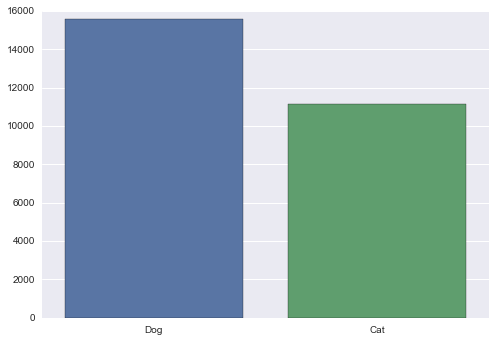

In [6]:
sns_plot=sns.countplot(train.AnimalType)
sns_plot.set(xlabel= "", ylabel="")
sns_plot.figure.savefig("animaltype.pdf")

In [7]:
train.AnimalType.value_counts()

Dog    15595
Cat    11134
Name: AnimalType, dtype: int64

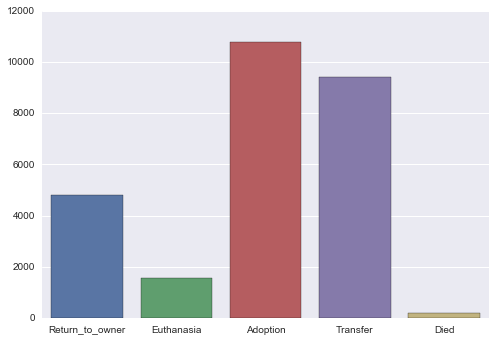

In [8]:
sns_plot= sns.countplot(train.OutcomeType)
sns_plot.set(xlabel= "", ylabel="")
sns_plot.figure.savefig("outcometype.pdf")

In [9]:
train.OutcomeType.value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

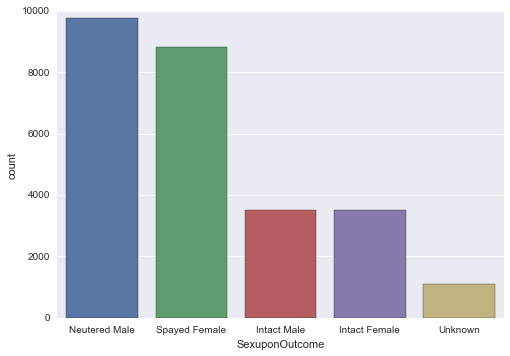

In [10]:
sns.countplot(train.SexuponOutcome)
sns_plot.set(xlabel= "", ylabel="")
sns_plot.figure.savefig("sexuponoutcome.pdf")

In [11]:
def categorising(dataset):
    opt = dataset.copy()

    opt["Intact"] = opt.SexuponOutcome.replace("Intact Male", "Yes")
    opt.Intact = opt.Intact.replace("Neutered Male", "No")
    opt.Intact = opt.Intact.replace("Spayed Female", "No")
    opt.Intact = opt.Intact.replace("Intact Female", "Yes")
    opt.Intact = opt.Intact.replace("Unknown", np.nan)

    opt.Intact = opt.Intact.astype("category")
    opt["IntactValue"] = opt.Intact.cat.codes

    opt.SexuponOutcome = opt.SexuponOutcome.replace("Neutered Male", "Male")
    opt.SexuponOutcome = opt.SexuponOutcome.replace("Intact Male", "Male")
    opt.SexuponOutcome = opt.SexuponOutcome.replace("Spayed Female", "Female")
    opt.SexuponOutcome = opt.SexuponOutcome.replace("Intact Female", "Female")
    opt.SexuponOutcome = opt.SexuponOutcome.replace("Unknown", np.nan)

    opt.SexuponOutcome = opt.SexuponOutcome.astype("category")
    opt["SexuponOutcomeValue"] = opt.SexuponOutcome.cat.codes
    
    opt.Color = opt.Color.astype("category")
    opt["ColorValue"] = opt.Color.cat.codes

    return opt
train = categorising(train)

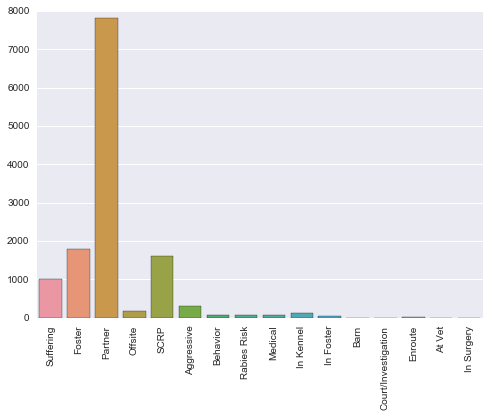

In [12]:
sn = sns.countplot(train.OutcomeSubtype)
sn.set(xlabel= "", ylabel="")
for item in sn.get_xticklabels():
    item.set_rotation(90)
sn.figure.savefig("outcomesubtype.pdf", bbox_inches='tight')

In [14]:
factor = {'year': 365, 'month': 31, 'week': 7, 'day': 1}
result = []
for age in train.AgeuponOutcome:
    if str(age) == 'nan':
        result.append(np.nan)
        continue
    value, unit = age.split(' ')
    days = int(value) * factor[unit.replace('s', '')] # ignore year[s], month[s], ...
    result.append(days)
train.AgeuponOutcomeInDays = pd.Series(result)
assert len(train.AgeuponOutcomeInDays) == len(train.AgeuponOutcome)

In [15]:
result = []
age_categories = [['younger than 1 years', 1*365.], 
                  ['younger than 2 years', 2*365.], 
                  ['younger than 5 years', 5*365.],
                  ['older than 5 years', 990*365.]]
for age in train.AgeuponOutcomeInDays:
    if str(age) == 'nan':
        result.append(np.nan)
        continue
    for limit in age_categories:
        if age < limit[1]:
            result.append(limit[0])
            break
    else:
        print(age)
train.AgeuponOutcomeCategory = pd.Series(result, name='AgeuponOutcomeCategory')
train.AgeuponOutcomeCategory = train.AgeuponOutcomeCategory.astype("category")
assert len(train.AgeuponOutcomeCategory) == len(train.AgeuponOutcome)
train.AgeuponOutcomeCategory.head()

0    younger than 2 years
1    younger than 2 years
2    younger than 5 years
3    younger than 1 years
4    younger than 5 years
Name: AgeuponOutcomeCategory, dtype: category
Categories (4, object): [older than 5 years, younger than 1 years, younger than 2 years, younger than 5 years]

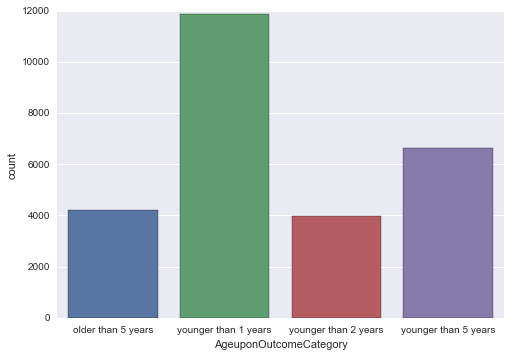

In [16]:
sns.countplot(train.AgeuponOutcomeCategory)

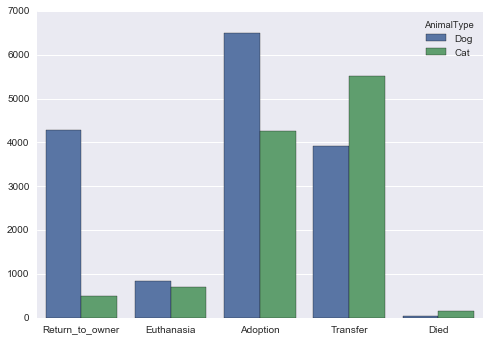

In [17]:
sns_plot = sns.countplot(data=train, x='OutcomeType', hue='AnimalType')
sns_plot.set(xlabel= "", ylabel="")
sns_plot.figure.savefig("outcome_animaltype.pdf")

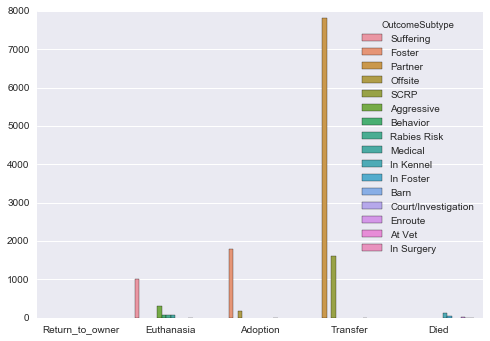

In [18]:
sns_plot = sns.countplot(data=train, x='OutcomeType', hue='OutcomeSubtype')
sns_plot.set(xlabel= "", ylabel="")
sns_plot.figure.savefig("outcome_intact.pdf")

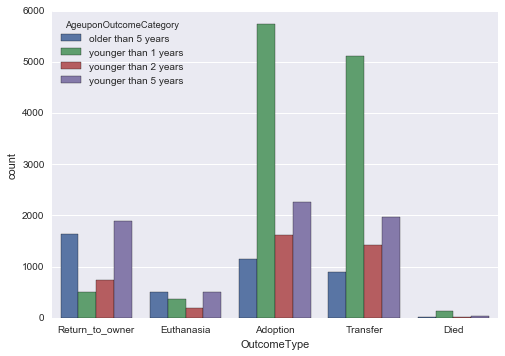

In [20]:
ax= sns.countplot(data=train, x='OutcomeType', hue=train.AgeuponOutcomeCategory)